In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as integrate

1. 
For a first order differential equation $\frac{dy}{dx} = f(x, y)$, the Euler method for approximating the value of $y(x_{1})$ from a known initial point $(x_{0}, y_{0})$ is given by $y_{1} = y_{0} + hf(x_{0}, y_{0})$ for one interval, where $h=x_{1}-x_{0}$.
<br>
<br>
The full expansion for $y(x_{1})$ in powers of $h$ is given by $y(x_{1}) = y_{0} + hf(x_{0}, y_{0})$ plus the infinitely many terms in increasing powers of $h$, each term bringing $y(x_{1})$ closer to its actual value. Taking $h$ to be small and truncating this expansion to second order gives $y_{1} = y_{0} + hf(x_{0}, y_{0}) + O(h^2)$, so the error on Euler's method for one interval is $O(h^2)$.

2. $n$ applications of Euler's method involves dividing the interval $[x_{0}, x_{1}]$ into $n$ sub-intervals and using Euler's method $n$ times over each of them. The combined error of $n$ sub-intervals is $nO(h^2)$, but since $h$ is the size of each sub-interval and $n \alpha \frac{1}{h}$, the total error over the whole interval is $O(h)$.

3. a) Analytically solving the differential equation gives $tan^{-1}y = t$, so $y(\frac{\pi}{4}) = 1$.

In [3]:
#b#
def q3euler(n):                                         
    h = (np.pi/4)/n                 #define h#
    xspacing=np.linspace(0, 1, n)   #create generic array with same number of objects as sub-intervals#
    y_n=0                           #set known initial y-value#
    for y in xspacing:              #loop through the array, aka loop through this for n-steps#
        grad=1+(y_n)**2             #applying Euler#
        y_n_plus_1=y_n + grad*h
        y_n=y_n_plus_1              #new y-value becomes the initial y-value ready for next calculation#
    return y_n                      #after n-steps, y_n is returned#

c) Since $h = \frac{\pi}{4n}$, to show that the approximate error is $O(h)$, graphing a log-log plot of error against $\frac{\pi}{4n}$ should return a linear relationship with a gradient $\approx1$.

Text(0.5, 0, 'log10  π/4n ')

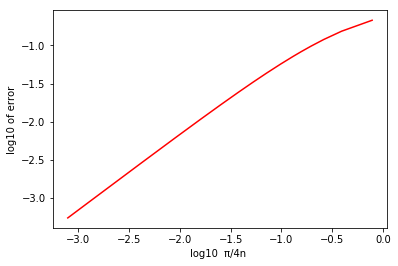

In [4]:
nvalues = np.linspace(1, 1000, 1000, dtype=int) #generate large array of n values#

euler_errors=[]                                 #generate corresponding list of errors#
for n in nvalues:
    error=(np.abs(1-q3euler(n)))
    euler_errors.append(error)

plt.plot(np.log10(np.pi/(4*nvalues)), np.log10(euler_errors), 'r')
plt.ylabel('log10 of error')
plt.xlabel('log10  π/4n ') 

5. a) $F=\frac{-dV}{dx}$, $V=\frac{1}{2}x^{2}$, and $m=1$, <br>
$\therefore F=-x=ma=\ddot{x}$. <br><br>
Let $z=$ velocity: <br>
$z=\dot{x}$ <br>
$\dot{z}=\ddot{x}=-x$. <br><br>
Let $\vec{y} = \begin{pmatrix}x \\ z\end{pmatrix}:$ <br>
$\frac{d\vec{y}}{dt}=f(t,\vec{y}) = \begin{pmatrix}\dot{x} \\ \dot{z}\end{pmatrix} = \begin{pmatrix}z \\ -x\end{pmatrix}$.


b) For a solution of the form $x = Ae^{\lambda_{1} t} + Be^{\lambda_{2}t}:$ <br>
$\ddot{x} + x=0 \Rightarrow \lambda^{2} + 1 = 0$ <br> $\lambda \pm i$ <br>
$\therefore x = Ae^{it} + Be^{-it} \\ = Ccos(t) + iDsin(t)$ <br>
Oscillations are real $\therefore x=Ccos(t)$. <br>
Beginning at a maximum displacement of $1$: <br>
$x(0)=1, v(0)=0 \\ \therefore C=1 \\ \therefore x=cos(t), z=-sin(t)$.


In [11]:
#c) i)#
def rk(t, n):                        #function takes inputs of stop and number of intervals#
    h=t/n                            #define h and create generic array as before#
    tspacing=np.linspace(0, 1, n)    
    y_n=[1, 0]                       #set vector of initial conditions#
    y = np.empty((n, 2))
    for i, t in enumerate(tspacing):
        k1x=h*y_n[1]                 #see below#
        k1z=h*(-1)*y_n[0]
        k2x=h*(y_n[1]+k1z/2)
        k2z=h*((-1)*y_n[0]-k1x/2)
        x_nplus1=y_n[0]+k2x
        z_nplus1=y_n[1]+k2z
        y_n=[x_nplus1, z_nplus1]
        y[i, :] = y_n                #keep list of x and z for all t values#
    return y
        



The Runge-Kutta method needs to be run simultaneously on $x$ and $z$ in the same loop, as the $\vec{k_{1}}$ and $\vec{k_{2}}$ vectors for $x$ and $z$ depend on each other.
<br><br>In order to check the function, plotting $x$ and $z$ as time progresses should return $x$ as $cos(t)$ and $z$ as $-sin(t)$, according to the analytic solution.

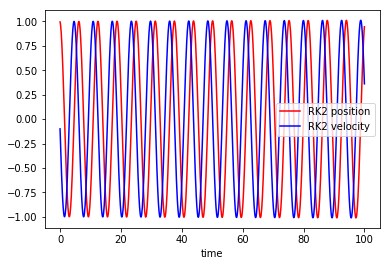

In [6]:
time_vals=np.linspace(0, 100, 1000)   #create time array between t=0 and t=100#

rk_vals = rk(100, 1000)   
rk_xvals=[y[0] for y in rk_vals]    #extract x and z values from the function output#
rk_zvals=[y[1] for y in rk_vals]

plt.plot(time_vals, rk_xvals, 'r', label='RK2 position')
plt.plot(time_vals, rk_zvals, 'b', label='RK2 velocity')
plt.xlabel('time')
plt.legend()

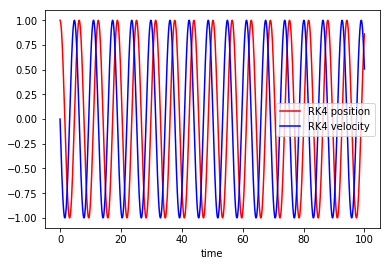

In [7]:
#c) ii)#
def yfunc(t, y):                     #define the right hand side of the differential equation#
    yfunc0=y[1]
    yfunc1=(-1)*y[0]
    y=np.array([yfunc0, yfunc1])
    return y                         #return an array of the same shape as y function, according to RK45 input rules#

def scipyrk(n, t):                   #see below#
    initial_y=np.asarray([1, 0])
    h=t/(n-1)
    return integrate.solve_ivp(yfunc, (0, t), initial_y, max_step=h, rtol=10, atol=10)

data_100=scipyrk(1000, 100)           #create a set of data for 100 intervals between t=0 and t=100#

time_values=(data_100).t             #extract time, position, and velocity values from the data#
x_values=(data_100).y[0]
z_values=(data_100).y[1]

plt.plot(time_values, x_values, 'r', label='RK4 position')
plt.plot(time_values, z_values, 'b', label='RK4 velocity')
plt.xlabel('time')
plt.legend()


The function scipyrk takes inputs of number of sub-intervals and the time at which to stop solving. It then uses $h=\frac{t}{n-1}$ to create the step size as before. The integration uses $h$ as the maximum step size, and the error tolerances rtol and atol are set high in order to fix the step size to the chosen maximum. 



3) iii) Below a function is defined for the 4th order Runge-Kutta method with adaptive step size. Removing the max_step and atol\rtol parameters causes the algorithm to choose the maximum step size according to the default error tolerances. 

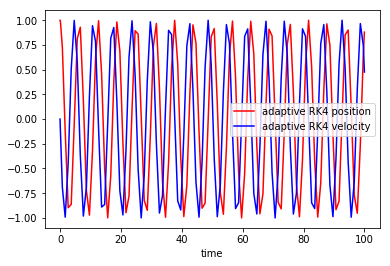

In [8]:
def adapt_scipyrk(t):                   
    initial_y=np.asarray([1, 0])
    return integrate.solve_ivp(yfunc, (0, t), initial_y)

adapt_data=adapt_scipyrk(100)               #create a set of data for 100 intervals between t=0 and t=100#

time_values=(adapt_data).t                  #extract time, position, and velocity values from the data#
x_values=(adapt_data).y[0]
z_values=(adapt_data).y[1]

plt.plot(time_values, x_values, 'r', label='adaptive RK4 position')
plt.plot(time_values, z_values, 'b', label='adaptive RK4 velocity')
plt.xlabel('time')
plt.legend()

In this case the default error tolerances cause large step sizes - the above graph can be smoothed out by decreasing the rtol and atol values.

d) $E=\frac{p^2}{2} + \frac{x^2}{2}$ and since energy is conserved, the energy of the system should remain at $\frac{1}{2}$. Plotted below is the log of the error on the energy after $1$ unit of time against the log of the number of sub-intervals, for the RK2 and RK4 methods.

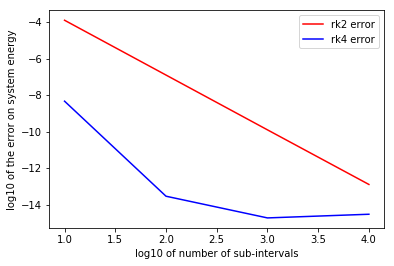

In [12]:
def rk2_en_error(n):                        #define function to calculate error after 1 second for n sub-intervals#
    en=0.5                                  #set actual energy#
    data_at_1=rk(1, n)[-1]                  #extract the data for position and velocity at 1 second#
    rk_xval=data_at_1[0]                      
    rk_zval=data_at_1[1]
    energy=(rk_xval**2/2 + rk_zval**2/2)    #calculate energy from this data and the differnece between this and the actual energy#
    error=np.abs(energy-en)
    return error

def rk4_en_error(n):
    en=0.5
    data_at_1=scipyrk(n, 1)
    xvalues=(data_at_1).y[0]
    zvalues=(data_at_1).y[1]
    x_at_1=xvalues[-1]
    z_at_1=zvalues[-1]
    energy=(x_at_1**2/2 + z_at_1**2/2)
    error=np.abs(energy-en)
    return error

nrange=np.logspace(1, 4, 4, dtype=np.int64, base=10)   #create range of number of subintervals and plot errors on both methods over this range#

rk2errors=[]
for n in nrange:
    rk2error=rk2_en_error(n)
    rk2errors.append(rk2error)
    
rk4errors=[]
for n in nrange:
    rk4error=rk4_en_error(n)
    rk4errors.append(rk4error)
    
plt.plot(np.log10(nrange), np.log10(rk2errors), 'r', label='rk2 error')
plt.plot(np.log10(nrange), np.log10(rk4errors), 'b', label='rk4 error')
plt.xlabel('log10 of number of sub-intervals')
plt.ylabel('log10 of the error on system energy')
plt.legend()



Log10 of the rk2 error decreases linearly with log10 of the number of subintervals. Log10 of the rk4 error remains at least 2 orders of magnitude smaller than log10 of rk2.

e) Plotted below is phase plot of position against velocity for the Runge-Kutta 2nd and 4th order solutions.

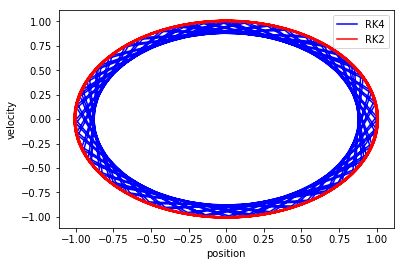

In [10]:
plt.plot(x_values, z_values, 'b', label='RK4')
plt.plot(rk_xvals, rk_zvals, 'r', label='RK2')
plt.xlabel('position')
plt.ylabel('velocity')
plt.legend()
